In [1]:
# Manuseio dos dados
import numpy as np
import pandas as pd
 
# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
 
# Divisão da base de dados
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
 
# API para modelo de Regressão Logística
import statsmodels.api as sm
 
# Avaliação da performance do modelo
from sklearn import metrics
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             recall_score, 
                             precision_score)

In [35]:
# Renomeando colunas do dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Visualizando dataset
data = pd.read_csv("diabetes.csv", header=None, names=col_names, skiprows=1)

data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Verificar as dimensões que nossa base de dados tem
data.shape 

(768, 9)

In [4]:
# Resumo estatístico dos dados
data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

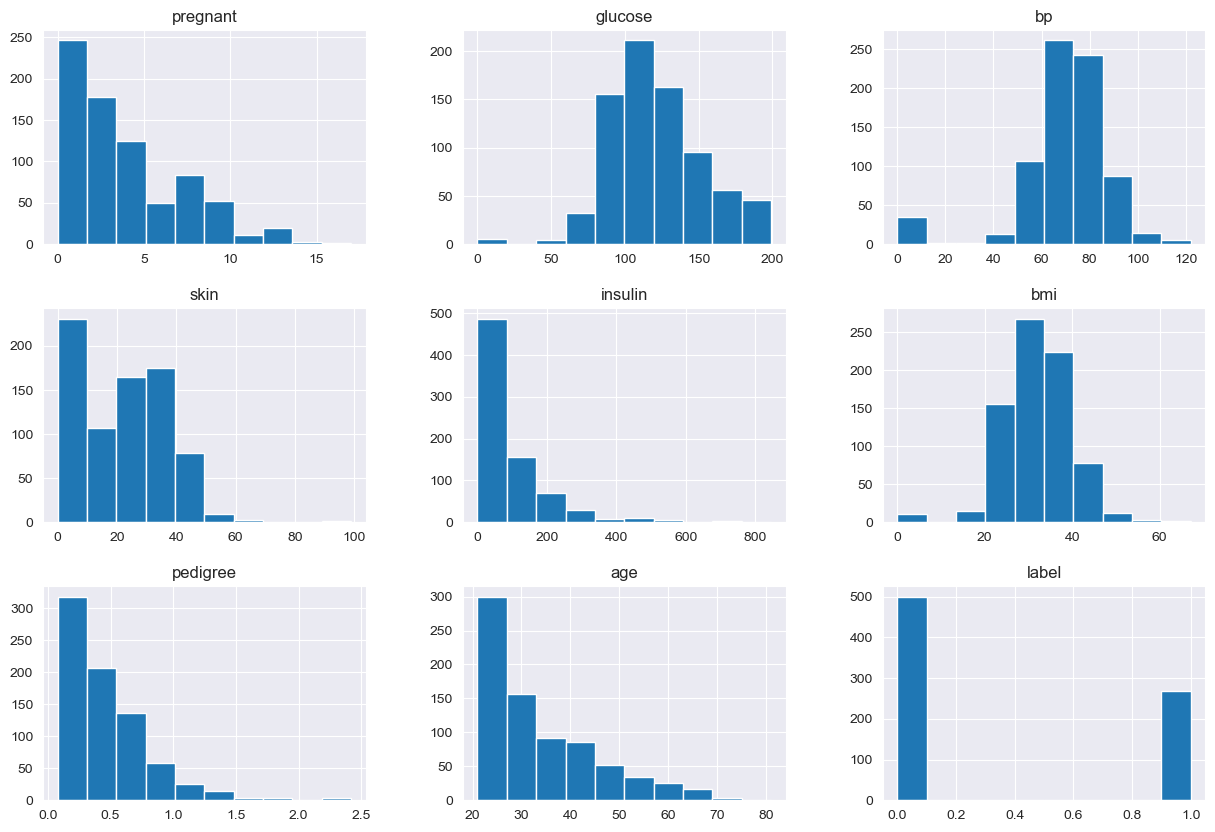

In [36]:
# Plota Histogramas para toda a base de dados
sns.set_style('darkgrid')
data.hist(figsize=(15,10))
plt.show()

# As colunas glucose, bp, skin, insulin e bmi têm observações com valores de 0, o que não é possível. 
# Essas entradas representam erros nos dados e precisa ser corrigido

In [41]:
# Iremos substituir os valores de 0 em todas as colunas por NaN 

# Colunas para converter 0 em NaN
cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
 
# Substitui 0 em NaN
data[cols] = data[cols].replace(0, np.nan)

In [42]:
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [43]:
# Imputando os valores nulos com a média da coluna

data[cols] = data[cols].fillna(data[cols].mean())

In [44]:
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

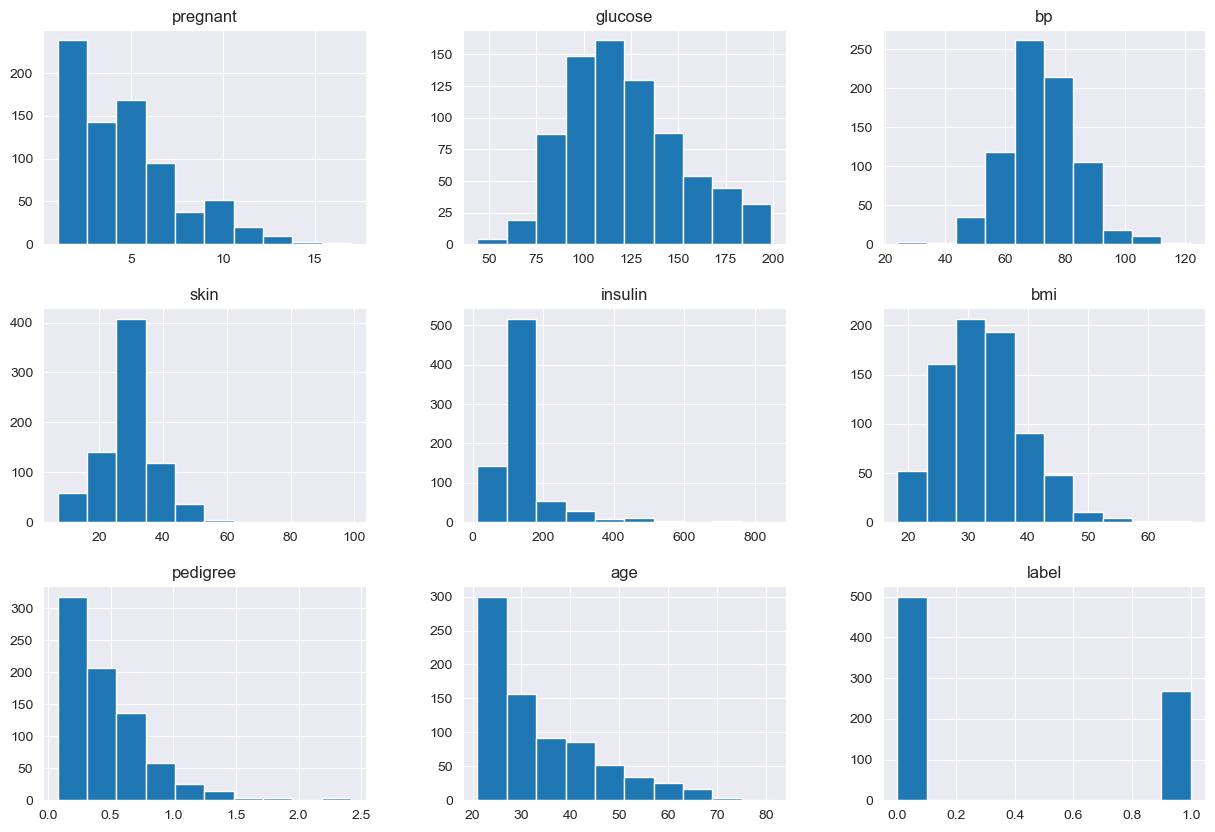

In [45]:
# Reanalise dos histogramas

sns.set_style('darkgrid')
data.hist(figsize=(15,10))
plt.show()

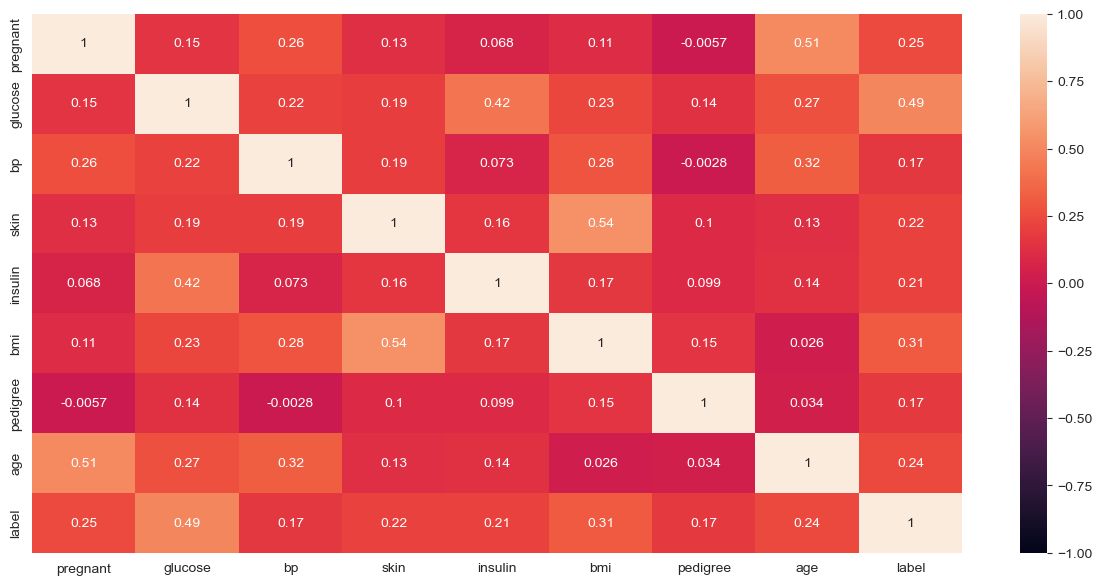

In [46]:
# Mapa de Calor para Correlação

plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [47]:
# Variáveis independentes (características)

X = data.drop(['label'], axis=1) #deixou tudo menos a class
 
# Variável dependente (alvo)
y = data['label']
 
# Adiciona a constante
X = sm.add_constant(X)

In [48]:
# Divisão dos dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.25,
                                                   random_state=16,
                                                   stratify=y) # mantém as proporções das classes

# O stratify é uma maneira eficaz de garantir que as proporções das classes na variável alvo y sejam mantidas 
# tanto no conjunto de treino quanto no de teste. Isso é especialmente importante em problemas de classificação, onde pode haver um desequilíbrio nas classes 


In [49]:
# Instancia e treina o modelo
modelo = LogisticRegression(random_state=16)
modelo.fit(X_train, y_train)
y_pred= modelo.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# Avaliação do modelo usando a matriz de confusão
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[114,  11],
       [ 32,  35]], dtype=int64)

NameError: name 'Text' is not defined

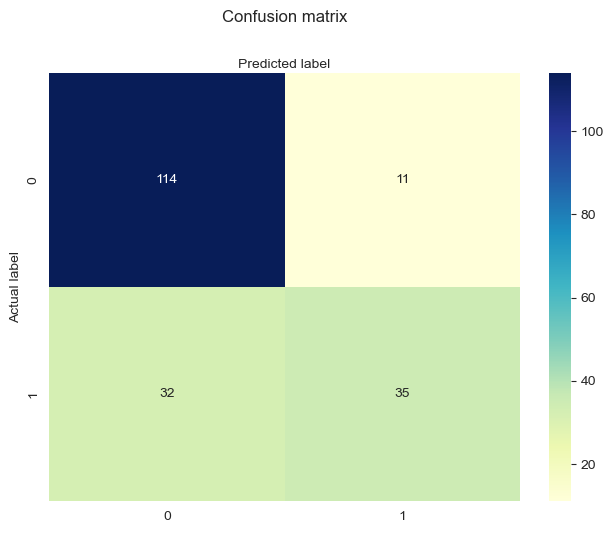

In [52]:
#Matriz de confusao em grafico 

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

In [53]:
# Métricas de avaliação da matriz de confusão

from sklearn.metrics import classification_report

target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

# Recall: Representa a proporção dos casos positivos que foram corretamente identificados
# F1-Score:  útil quando você quer um equilíbrio entre precisão e recall. Um valor mais alto indica que o modelo tem um bom equilíbrio entre identificar corretamente e errar menos nas previsões.
# Support: É o número de ocorrências de cada classe no conjunto de dados

# Accuracy (Precisão Geral): É a proporção de previsões corretas entre todas as amostras.
# Macro Avg: dá a média simples de desempenho por classe.
# Weighted Avg: leva em conta o número de exemplos de cada classe, dando mais peso para as classes maiores (nesse caso, "sem diabetes").

                  precision    recall  f1-score   support

without diabetes       0.78      0.91      0.84       125
   with diabetes       0.76      0.52      0.62        67

        accuracy                           0.78       192
       macro avg       0.77      0.72      0.73       192
    weighted avg       0.77      0.78      0.76       192



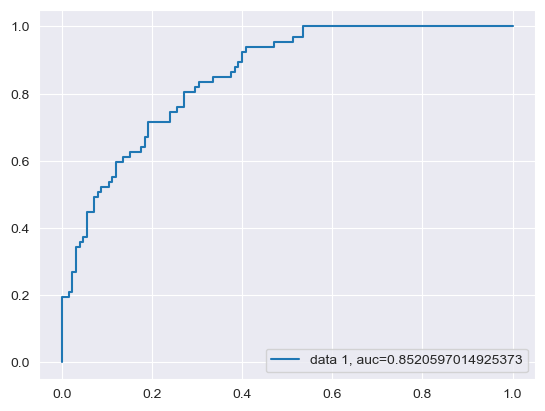

In [54]:
# Curva ROC ( é um gráfico da taxa de verdadeiros positivos em relação à taxa de falsos positivos)
y_pred_proba = modelo.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [55]:
# Teste com variaveis aleatorias para analise de probabilidade


# Remover a coluna 'label' e garantir que X_new tenha o mesmo formato do treinamento
X_new = [[1, 2, 130, 75, 32, 85, 28.4, 0.515, 45]]  # Inclui o valor 1 como a constante

# Calcular a probabilidade de cada classe
probabilidade = modelo.predict_proba(X_new)

# Exibir as probabilidades para as classes (0 e 1)
print("Probabilidade de 0:", probabilidade[0][0])
print("Probabilidade de 1:", probabilidade[0][1])


Probabilidade de 0: 0.6766286547716824
Probabilidade de 1: 0.3233713452283175


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
